<h1>   
    <font color = Navy>
        <span style='font-family:Arial Black'>
            DATA ANALYSIS: WORLD ENERGY (G7 COUNTRIES)
        </span>   
    </font>
</h1>
<h2>
    <font color = Indigo>
        <span style='font-family:monospace'>
            by Itsuki Emoto (2023/11/7)
        </span>   
    </font>  
</h2>

<h3>   
    <font color = black>
        <span style='font-family:monospace'>
            <ins>Table of Contents</ins>
        </span>   
    </font>    
</h3>
<span style='font-family:monospace'>
    <font color = black>
        <ol>
            <li><a href='#AboutDataset'>About Dataset</a></li>
            <li><a href='#Preparation'>Preparation</a></li>
            <li><a href='#Interpretation'>Data Interpretation</a></li>
            <li><a href='#Scope'>Scope</a></li>
            <li><a href='#Goals'>Goals</a></li>
            <li><a href='#Cleaning'>Data Cleaning and Manipulation</a></li>
            <li><a href='#Modeling'>Modeling and Analysis</a></li>
            <li><a href='#Overview'>World Overview</a></li>
            <li><a href='#Conclusion'>Conclusion</a></li>            
        </ol>
    </font>
</span>

<a id="AboutDataset"></a>
<h2>   
    <font color = blue>
        <span style='font-family:monospace'>
            1. About Dataset
        </span>   
    </font>    
</h2>

Source: <a href='https://ourworldindata.org/energy'> <b>Our World in Data</b> </a>
(<a href='https://github.com/owid/energy-data'> <b>Github</b> </a>) <br>
Downloaded from the website on 11 October 2023

<a id="Preparation"></a>
<h2>   
    <font color = blue>
        <span style='font-family:monospace'>
            2. Preparation
        </span>   
    </font>    
</h2>

<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            2.1 Importing the Libraries
        </span>   
    </font>    
</h3>

In [164]:
# data manipulation
import pandas as pd
import numpy as np
from sklearn import datasets

# data vizualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import geopandas
from geodatasets import get_path
import fiona
import folium
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            2.2 Adjusting Views
        </span>   
    </font>    
</h3>

In [165]:
# applying some styles
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

<a id="Interpretation"></a>
<h2>   
    <font color = blue>
        <span style='font-family:monospace'>
            3. Data Interpretation
        </span>   
    </font>    
</h2>

<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            3.1 Data Import
        </span>   
    </font>    
</h3>

In [166]:
# Importing data
df_WE_all = pd.read_csv('owid-energy-data.csv')

<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            3.2 Inspecting Dataset
        </span>   
    </font>    
</h3>

In [118]:
# Database dimension
print("Database dimension - df_WE_all:",df_WE_all.shape)

# Database size
print("Database size      - df_WE_all:",df_WE_all.size)

Database dimension - df_WE_all: (21861, 129)
Database size      - df_WE_all: 2820069


In [157]:
# Database column types
df_WE_all.info(verbose=True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21861 entries, 0 to 21860
Data columns (total 129 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    country                                       21861 non-null  object 
 1    year                                          21861 non-null  int64  
 2    iso_code                                      16393 non-null  object 
 3    population                                    18094 non-null  float64
 4    gdp                                           11113 non-null  float64
 5    biofuel_cons_change_pct                       862 non-null    float64
 6    biofuel_cons_change_twh                       1337 non-null   float64
 7    biofuel_cons_per_capita                       952 non-null    float64
 8    biofuel_consumption                           1372 non-null   float64
 9    biofuel_elec_per_capita                       51

<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            3.3 Reviewing Data
        </span>   
    </font>    
</h3>

In [120]:
# The first 5 data
df_WE_all.head(5)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [121]:
# The last 3 data
df_WE_all.tail(3)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
21858,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,0.38,4.612,NaN,387.136,NaN,NaN,NaN,NaN,235.760,3.62,-21.529,-5.405,1283.004,19.700,43.932,NaN,9.35,8.24,NaN,4.052,1.925,3219.013,NaN,NaN,NaN,238.365,3.66,NaN,NaN,44.417,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3.19,NaN,NaN,NaN,271.580,4.17,NaN,50.607,NaN,NaN,NaN,NaN,298.282,4.58,NaN,55.583,NaN,1.11,11.872,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2.605,0.04,NaN,NaN,NaN,NaN,NaN,0.485,NaN,NaN,0.38,0.0,NaN,NaN,24.748,0.0,NaN,4.612,0.0,NaN,536.647,49.427,NaN,NaN,NaN,298.282,4.58,NaN,55.583,NaN,NaN,NaN,NaN,1.954,0.03,NaN,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21859,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,0.35,4.605,NaN,389.474,NaN,NaN,NaN,NaN,215.065,3.37,3.004,0.592,1294.978,20.292,44.342,NaN,9.58,7.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.618,3.41,NaN,NaN,44.868,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.96,NaN,NaN,NaN,243.145,3.81,NaN,50.132,NaN,NaN,NaN,NaN,267.396,4.19,NaN,55.132,NaN,1.98,20.668,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2.553,0.04,NaN,NaN,NaN,NaN,NaN,0.526,NaN,NaN,0.35,0.0,NaN,NaN,22.336,0.0,NaN,4.605,0.0,NaN,485.014,NaN,NaN,NaN,NaN,267.396,4.19,NaN,55.132,NaN,NaN,NaN,NaN,1.915,0.0

In [122]:
# Filtering the data frame to only Indonesia later than 2012
df_WE_indonesia = df_WE_all[(df_WE_all['iso_code'] == 'IDN') & (df_WE_all['year'] > 2012)]
df_WE_indonesia

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
9385,Indonesia,2013,IDN,253275920.0,2.406466e+12,45.816,3.226,40.532,10.266,36.087,9.14,4.059,0.545,607.523,-12.263,-69.015,1949.618,493.791,439.244,111.25,22.870,605.087,12835.454,3250.911,49.409,26.224,225.16,225.16,11.958,-3.555,-69.402,7434.578,0.782,-4.413,-83.172,748.828,189.66,7112.616,1801.454,84.233,95.669,3.570,15.343,445.055,229.197,58.05,1757.194,-0.863,-6.759,3064.786,776.237,25.782,23.635,136.79,32.218,11.027,46.122,66.805,16.92,182.100,7.515,2.449,24.533,13.770,81.545,140.163,35.50,321.962,15.767,4.331,0.00,0.000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.307,-29.500,862.608,80.387,20.36,3405.805,-4.975,-25.796,1945.318,492.702,9.042,45.810,25.143,18.57,9.43,-1.066,-0.477,73.319,37.232,99.270,8.247,4.188,1.335,888.991,1883.000,24.533,13.770,81.545,140.163,35.50,321.962,15.767,4.331,82.724,0.007,0.015,0.039,0.01,0.059,0.004,0.001,-97.831,-0.012,0.000,0.000,0.00,0.001,0.000,0.000
9386,Indonesia,2014,IDN,256229760.0,2.526853e+12,70.470,7.234,68.298,17.500,35.827,9.18,3.865,0.918,617.422,5.703,28.160,2037.043,521.951,466.495,119.53,-3.431,-111.532,12252.205,3139.380,50.324,27.372,237.53,237.52,12.456,1.266,23.847,7441.941,0.755,1.110,19.992,792.687,203.11,7108.644,1821.446,85.513,95.521,-1.042

In [154]:
# Countries and regions included
pd.DataFrame(df_WE_all.country.unique()).reset_index()

,index,0
0,0,Afghanistan
1,1,Africa
2,2,Africa (BP)
3,3,Africa (Ember)
4,4,Africa (Shift)
5,5,Albania
6,6,Algeria
7,7,American Samoa
8,8,Angola
9,9,Antarctica


<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            3.4 Data Dictionary
        </span>   
    </font>    
</h3>

In [158]:
# Importing data dictionary from source
df_WE_codebook = pd.read_csv('owid-energy-codebook.csv')
df_WE_codebook

,column,description,unit,source
0,country,Country - Geographic location.,NaN,Our World in Data - Regions (2023)
1,year,Year - Year of observation.,NaN,Our World in Data - Regions (2023)
2,iso_code,ISO code - ISO 3166-1 alpha-3 three-letter cou...,NaN,International Organization for Standardization...
3,population,"Population - Population by country, available ...",persons,Population based on various sources (2023) [ht...
4,gdp,Gross domestic product (GDP) - This data is ad...,international-$ in 2011 prices,Bolt and van Zanden - Maddison Project Databas...
5,biofuel_cons_change_pct,Annual percentage change in biofuel consumptio...,%,Energy Institute - Statistical Review of World...
6,biofuel_cons_change_twh,Annual change in biofuel consumption - Include...,terawatt-hours,Energy Institute - Statistical Review of World...
7,biofuel_cons_per_capita,Biofuel consumption per capita - Measured in k...,kilowatt-hours,Energy Institute - Statistical Review of World...
8,biofuel_consumption,Primary energy consumption from biofuels - Mea...,terawatt-hours,Energy Institute - Statistical Review of World...
9,biofuel_elec_per_capita,Electricity generation from bioenergy per pers...,kilowatt-hours,Ember - Yearly Electricity Data (2024) [https:...


<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            3.5 Data Granularity
        </span>   
    </font>    
</h3>

<h4>
    <font color = Black>
        <span>
            Focus parameters for the data analysis
        </span>   
    </font> 
</h4>

- Year (1900-2023)
- Country
- Population
- Gross domestic product (GDP), inflation-adjusted
- Annual percentage change in primary energy consumption
- Annual change in primary energy consumption (TWh)
- Primary energy consumption (TWh)
- Per capita primary energy consumption (KWh)
- Per unit of GDP energy consumption (KWh)
- Electricity demand (TWh)
- Electricity generation (TWh)
- Per capita electricity gereration (KWh)
- Electricity generation as a share of primary energy
- Net elecricity import (TWh)
- Net electricity imports as a share of electricity demand

<h4>
    <font color = Black>
        <span>
            Granularity of the data
        </span>   
    </font> 
</h4>
The dataset is structured at the country level. Each entry corresponds to an individual country or region, with the data fields containing information relevant to that specific entity. These fields detail various types of energy consumption on an annual basis. <br> <br>


The energy can be classified into the following categories:
<br>

- Fossils (coal, oil, natural gas, and low-carbon fuels) <br>
- Nuclear <br>
- Renewables (hydropower, wind, solar, biofuels, and other renewable options) <br>

<div class="alert alert-block alert-info">
    <span>
        <b><ins>Insight</ins></b>
        <br>
        <br>
        The dataset consists of 21,861 energy-related entries spanning 305 countries and regions from the year 1900 to 2021, covering 129 distinct fields.
        <br> 
        <br>
        The data types of the columns include object, int64, and float64, and it appears that each field's type aligns appropriately with its content, indicating that no corrections are necessary.
        <br>
        <br>
        However, certain data points are associated with continents, while others pertain to specific regions or segments of continents that can only be accurately interpreted by the dataset's creator. Consequently, not all data can be effectively utilized, requiring a data cleaning process. 
        <br>     
    </span>
</div>

<a id="Scope"></a>
<h2>   
    <font color = blue>
       <span style='font-family:monospace'>
            4. Scope
        </span>   
    </font>    
</h2>

The focuses of this analysis are the G7 countries, including the United States, Canada, United Kingdom, France, Germany, Italy, and Japan. The period is from 1990 to 2021.

<a id="Goals"></a>
<h2>   
    <font color = blue>
       <span style='font-family:monospace'>
            5. Goals
        </span>   
    </font>    
</h2>

The goals of this analysis are: <br>
1. To know which country consumes the most energy.
2. To determine the energy consumption per capita and GDP for each G7 country.
3. To get the portion of energy consumption in the form of electricity.
4. To compare the consumption of primary energy sources (fossil, nuclear, renewable).
5. To analyze the source of energy that has grown the most over the last 30 years.
6. To visualize the energy production patterns in different countries, including the source of energy production, such as coal, gas, oil, or biofuels.
7. To know the relationship among energy production, consumption, and economic indicators, such as GDP, population, and energy consumption per GDP.
8. To discuss the environmental impact of energy production and consumption, including greenhouse gas emissions and carbon intensity of electricity production.

<a id="Cleaning"></a>
<h2>   
    <font color = blue>
       <span style='font-family:monospace'>
            6. Data Cleaning and Manipulation
        </span>   
    </font>    
</h2>

In [126]:
# Creating new data frame for the assumed data G7 countries
G7_Countries = ['United States', 'Canada',  'United Kingdom', 'France',  'Germany', 'Italy',    'Japan']
G7_Color     = ['#002868',       '#FF0000', '#C8102E',        '#0055A4', '#FFCE00',  '#009246', '#be0029']
#G7_Color    = ['#BF0A30',       '#FFFFFF', '#012169',        '#EF4135', '#DD0000',  '#CE2B37', '#ffffff']
#e6ffe6
#ffe6e6

df_WE_G7 = df_WE_all[df_WE_all.country.isin(G7_Countries) & df_WE_all.year.between(1990, 2021)]

pd.DataFrame(df_WE_G7.country.unique()).reset_index()

,index,0
0,0,Canada
1,1,France
2,2,Germany
3,3,Italy
4,4,Japan
5,5,United Kingdom
6,6,United States


In [127]:
# Changing the name of some columns in G7 data frame
df_WE_G7 = df_WE_G7.rename(columns={
                   'gdp':                           'GDP',
                   'energy_per_capita':             'Energy_Consumption_PerCapita',
                   'energy_per_gdp':                'Energy_Consumption_PerGDP',
                   'net_elec_imports':              'Net_Electricity_Imports',
                   'net_elec_imports_share_demand': '%Electricity_Imports_As_Demand',
                   'electricity_demand':            'Electricity_Demand',
                   'electricity_generation':        'Electricity_Generation',
                   'electricity_share_energy':      '%Electricity_As_Energy',
                   'per_capita_electricity':        'Electricity_Comsumption_PerCapita',
                   'primary_energy_consumption':    'Total_Energy_Consumption',
                   'population':                    'Population'})

<h3 name='libraries'>   
    <font color = purple >
       <span style='font-family:monospace'>
            6.1 Correlations
        </span>   
    </font>    
</h3>

In [128]:
# Checking if there are any correlations among the general columns data:
corr_col = ['GDP', 'Population', 'Energy_Consumption_PerCapita', 'Energy_Consumption_PerGDP',
            'Net_Electricity_Imports', '%Electricity_Imports_As_Demand','Electricity_Demand',
            'Electricity_Generation', '%Electricity_As_Energy', 'Electricity_Comsumption_PerCapita',
             'Total_Energy_Consumption']

df_corr_matrix = df_WE_G7[corr_col].corr()

# Removing the upper part of the correlation matrix
df_corr_lower = df_corr_matrix.where(np.tril(np.ones(df_corr_matrix.shape),k=-1).astype(np.bool_))

# Removing non-correlated variables 
df_corr_lower.mask((df_corr_lower.values < 0.5) & (df_corr_lower.values > -0.5), np.nan, inplace=True)

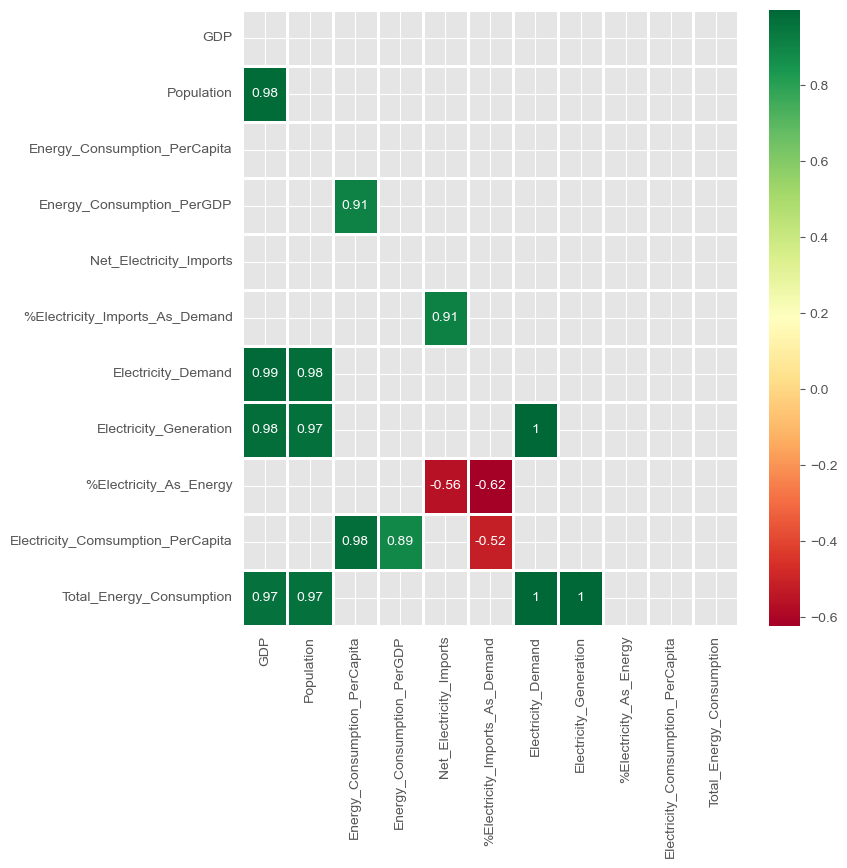

In [129]:
# Visualizing the correlated variables in the G7 data frame

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(df_corr_lower,
            xticklabels=df_corr_lower.columns,
            yticklabels=df_corr_lower.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

In [130]:
# Changing the name of some other columns in the G7 data frame
df_WE_G7 = df_WE_G7.rename(columns={
                    'fossil_elec_per_capita':       'Electricity_from_Fossil_PerCapita',
                    'fossil_energy_per_capita':     'Fossil_Consumption_PerCapita',
                    'fossil_share_elec':            '%Electricity_from_Fossil',
                    'fossil_share_energy':          '%Energy_from_Fossil',
                    'nuclear_elec_per_capita':      'Electricity_from_Nuclear_PerCapita',
                    'nuclear_energy_per_capita':    'Nuclear_Consumption_PerCapita',
                    'nuclear_share_elec':           '%Electricity_from_Nuclear',
                    'nuclear_share_energy':         '%Energy_from_Nuclear',
                    'renewables_elec_per_capita':   'Electricity_from_Renewables_PerCapita',
                    'renewables_energy_per_capita': 'Renewables_Consumption_PerCapita',
                    'renewables_share_elec':        '%Electricity_from_Renewables',
                    'renewables_share_energy':      '%Energy_from_Renewables'})

In [131]:
# Checking if there are any correlations among the general columns' data
corr_col = ['GDP', 'Population', 'Energy_Consumption_PerCapita', 'Energy_Consumption_PerGDP',
            'Net_Electricity_Imports', '%Electricity_Imports_As_Demand','Electricity_Demand',
            'Electricity_Generation', '%Electricity_As_Energy', 'Electricity_Comsumption_PerCapita',
            'Total_Energy_Consumption', 'Electricity_from_Fossil_PerCapita', 'Fossil_Consumption_PerCapita',
            '%Electricity_from_Fossil', '%Energy_from_Fossil', 'Electricity_from_Nuclear_PerCapita',
            'Nuclear_Consumption_PerCapita', '%Electricity_from_Nuclear', '%Energy_from_Nuclear',
            'Electricity_from_Renewables_PerCapita', 'Renewables_Consumption_PerCapita',
            '%Electricity_from_Renewables', '%Energy_from_Renewables']

df_corr_matrix = df_WE_G7[corr_col].corr()

# Removing the upper part of the correlation matrix
df_corr_lower = df_corr_matrix.where(np.tril(np.ones(df_corr_matrix.shape),k=-1).astype(np.bool_))

# Removing non-correlated variables 
df_corr_lower.mask((df_corr_lower.values < 0.5) & (df_corr_lower.values > -0.5), np.nan, inplace=True)

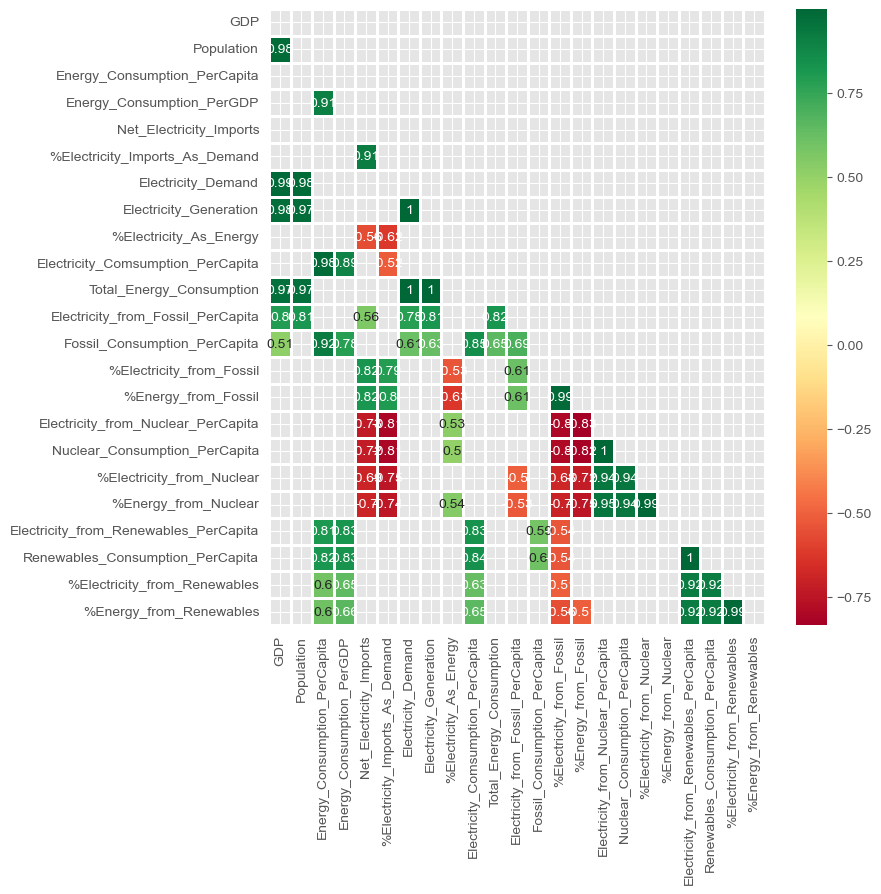

In [132]:
# Visualizing the correlated variables in the G7 data frame

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(df_corr_lower,
            xticklabels=df_corr_lower.columns,
            yticklabels=df_corr_lower.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

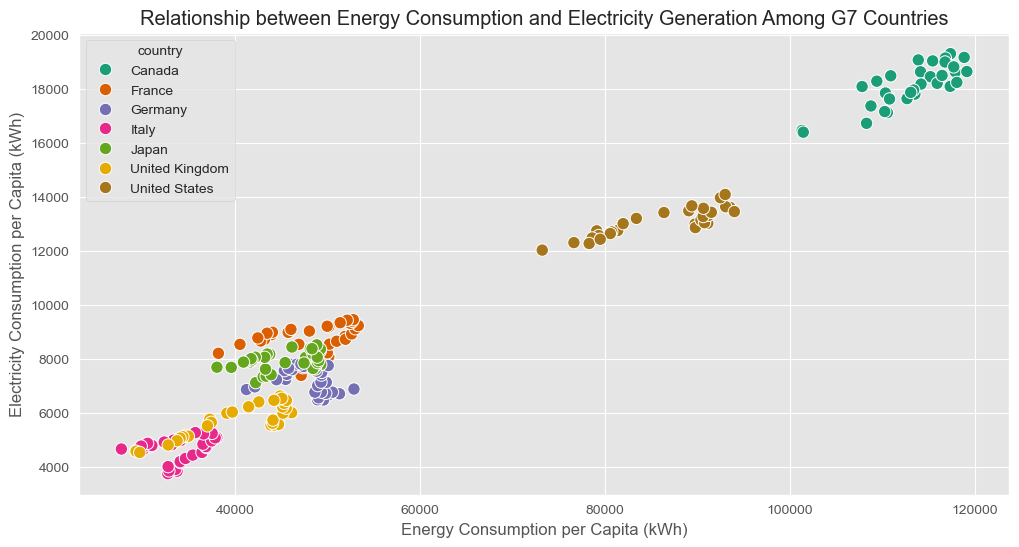

In [133]:
sns.scatterplot(x="Energy_Consumption_PerCapita", y="Electricity_Comsumption_PerCapita", hue="country", data=df_WE_G7, palette="Dark2", s=80)
plt.title("Relationship between Energy Consumption and Electricity Generation Among G7 Countries")
plt.xlabel("Energy Consumption per Capita (kWh)")
plt.ylabel("Electricity Consumption per Capita (kWh)")
plt.show()

<div class="alert alert-block alert-info">
    <span>
        <b><ins>Insights</ins></b><br><br>
            1. The correlation matrix indicates that electricity is the dominant form of primary energy consumption in G7 nations:<br>
            &nbsp&nbsp&nbsp&nbsp * There is a strong correlation between energy consumption and both electricity demand and generation.<br><br>
            2. It is important to highlight that while electricity represents the largest share of primary energy consumption in G7 countries, these nations do not necessarily focus on domestic generation to satisfy their demand:<br>     
            &nbsp&nbsp&nbsp&nbsp * The share of electricity within total energy consumption <ins>does not</ins> inherently correlate with the level of electricity generation.<br><br>
            3. The G7 countries tend to favor importing electricity rather than producing it from nuclear sources: <br>
             &nbsp&nbsp&nbsp&nbsp * There is a negative correlation between nuclear generation and electricity imports.<br><br>
            4. Additional investigation is necessary to obtain a more comprehensive understanding of these findings, which will be explored in the following sections of the report. <br>
    </span>  
</div>

<a id="Modeling"></a>
<h2>   
    <font color = blue>
       <span style='font-family:monospace'>
           7. Data Modeling and Analysis
       </span>   
    </font>    
</h2>

<h3 name='libraries'>   
    <font color = purple >
       <span style='font-family:monospace'>
            7.1 Energy and Electricity Comsumption
        </span>   
    </font>    
</h3>

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, '%'),
 Text(0.5, 1.0, 'Percentage of Electricity Demand Imported')]

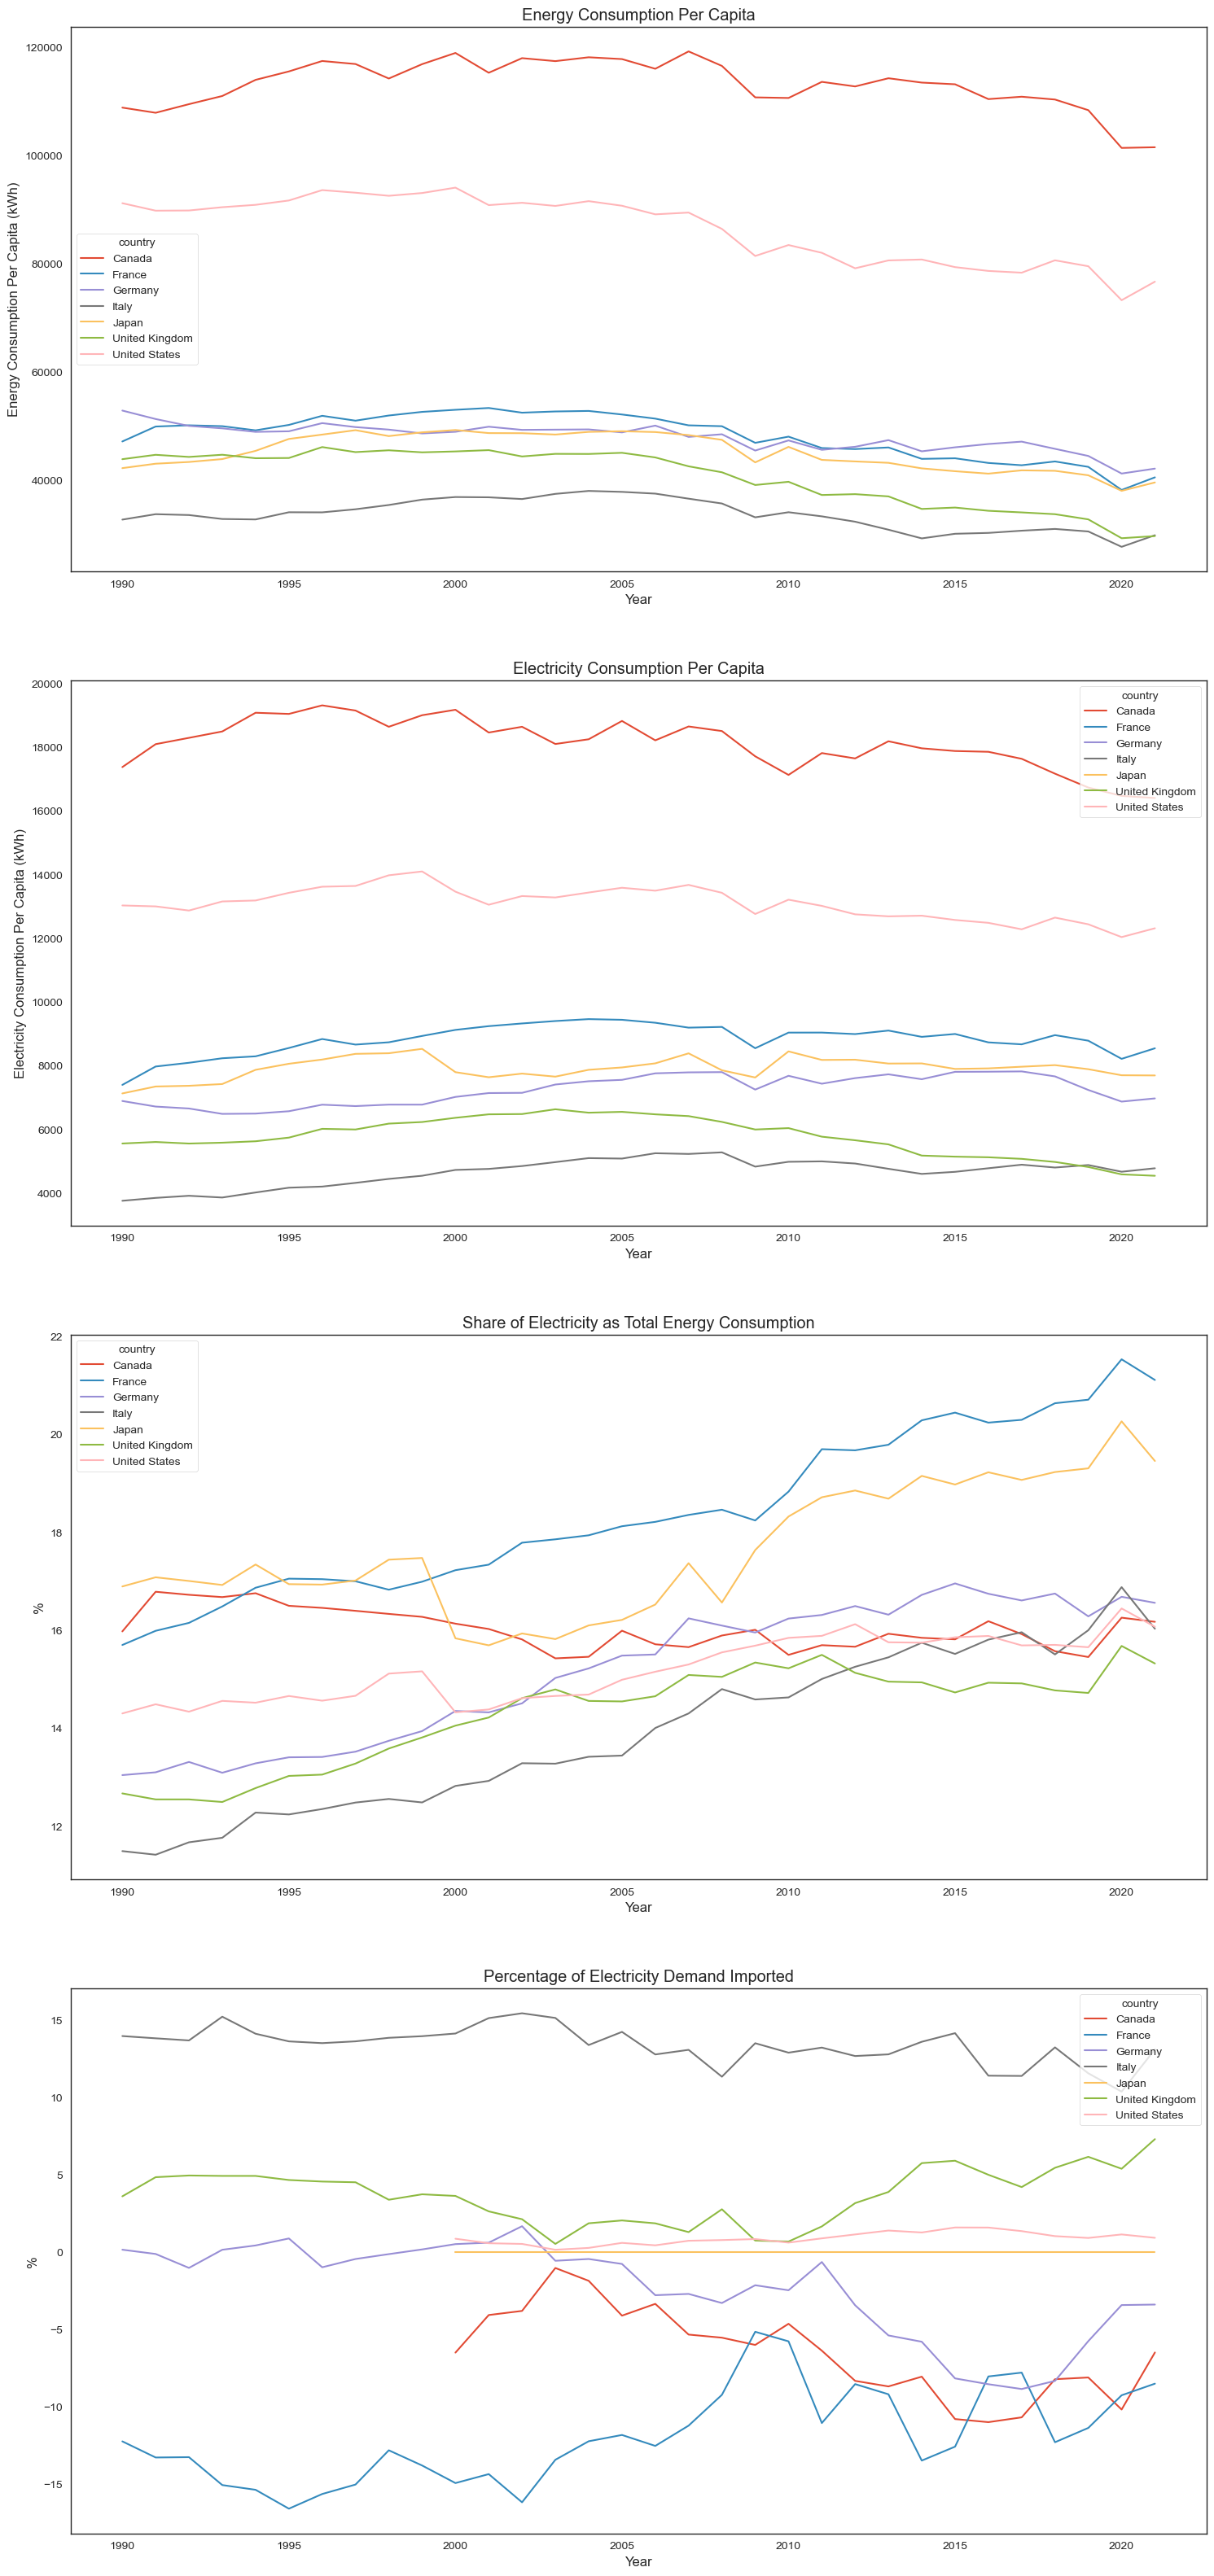

In [134]:
# Setting the style
sns.set_style("white")

fig, axes = plt.subplots(4, 1, figsize=(18, 40))

sns.lineplot(ax=axes[0], data=df_WE_G7, x='year', y='Energy_Consumption_PerCapita', hue = 'country')
axes[0].set(xlabel ="Year", ylabel = "Energy Consumption Per Capita (kWh)", title ='Energy Consumption Per Capita')

sns.lineplot(ax=axes[1], data=df_WE_G7, x='year', y='Electricity_Comsumption_PerCapita', hue = 'country')
axes[1].set(xlabel ="Year", ylabel = "Electricity Consumption Per Capita (kWh)", title ='Electricity Consumption Per Capita')

sns.lineplot(ax=axes[2], data=df_WE_G7, x='year', y='%Electricity_As_Energy', hue = 'country')
axes[2].set(xlabel ="Year", ylabel = "%", title ='Share of Electricity as Total Energy Consumption')

sns.lineplot(ax=axes[3], data=df_WE_G7, x='year', y='%Electricity_Imports_As_Demand', hue = 'country')
axes[3].set(xlabel ="Year", ylabel = "%", title ='Percentage of Electricity Demand Imported')

<div class="alert alert-block alert-info">
    <span>
        <b><ins>Insights</ins></b><br><br>
            1. Canada has the highest energy and electricity consumption per capita among the G7 nations, driven by its cold climate, vast geography, and energy-intensive industries, including heavy reliance on electricity for heating and industrial use.<br><br>
            2. G7 countries, particularly France and Japan, are increasing their use of electricity as a cleaner energy source. They have invested heavily in renewable technologies like wind, solar, and hydro, aligning with the global trend toward reducing carbon emissions and meeting climate goals. As a result, the share of electricity in total energy consumption has risen in these nations.<br><br>
            3. Italy is one of the largest electricity importers in the G7, depending on external sources for its energy needs. In contrast, France, Canada, and Germany are significant exporters, with France leading due to its robust nuclear energy infrastructure. Japan, however, maintains energy self-sufficiency, focusing on energy efficiency and investments in nuclear and renewable energy to reduce dependence on imports.<br><br>
    </span>  
</div>

<h3 name='libraries'>   
    <font color = purple >
       <span style='font-family:monospace'>
            7.2 Annual changes in energy consumption
        </span>   
    </font>    
</h3>

In [135]:
# Changing the name of some other columns in the G7 data frame
df_WE_G7 = df_WE_G7.rename(columns={
                    'energy_cons_change_twh':     'Annual_Change_in_Energy_Consumption',
                    'fossil_cons_change_twh':     'Annual_Change_in_Fossil_Energy_Consumption',
                    'nuclear_cons_change_twh':    'Annual_Change_in_Nuclear_Energy_Consumption',
                    'renewables_cons_change_twh': 'Annual_Change_in_Renewable_Energy_Consumption'})

In [136]:
energyType = ['Annual_Change_in_Energy_Consumption', 'Annual_Change_in_Fossil_Energy_Consumption', 'Annual_Change_in_Nuclear_Energy_Consumption', 'Annual_Change_in_Renewable_Energy_Consumption']

@interact(EnergyType = energyType)

def f(EnergyType):
    df2 = df_WE_G7[df_WE_G7.year >= 2010]
    sns.lineplot(x="year", y=EnergyType, data=df2, hue='country').set(title = "Annual Change", xlabel='Year')
    return

interactive(children=(Dropdown(description='EnergyType', options=('Annual_Change_in_Energy_Consumption', 'Annu…

<h3 name='libraries'>   
    <font color = purple >
       <span style='font-family:monospace'>
            7.3 Outliers analysis
        </span>   
    </font>    
</h3>

In [137]:
plt.figure(figsize = (30, 15))

@interact(EnergyType = energyType)

def f(EnergyType):
    df2 = df_WE_G7[df_WE_G7.year >= 2010]
    sns.boxplot(data=df2, x = 'country', y = EnergyType, hue = "country", showfliers=True).set(title = "Annual Change", xlabel='Year')
    return

<Figure size 3000x1500 with 0 Axes>

interactive(children=(Dropdown(description='EnergyType', options=('Annual_Change_in_Energy_Consumption', 'Annu…

In [138]:
df_sort = df_WE_G7[df_WE_G7['country'] == 'United States'].reindex(df_WE_G7['Annual_Change_in_Energy_Consumption'].abs().sort_values(ascending=False).index).reset_index()
df_sort = df_sort[df_sort['year'].notnull()].head(5)
df_sort[['country', 'year', 'Annual_Change_in_Energy_Consumption']].sort_values('year')

,country,year,Annual_Change_in_Energy_Consumption
1,United States,2009.0,-1299.984
4,United States,2010.0,846.334
3,United States,2018.0,943.441
0,United States,2020.0,-1978.438
2,United States,2021.0,1232.238


In [139]:
df_sort = df_WE_G7[df_WE_G7['country'] == 'United States'].reindex(df_WE_G7['Annual_Change_in_Fossil_Energy_Consumption'].abs().sort_values(ascending=False).index).reset_index()
df_sort = df_sort[df_sort['year'].notnull()].head(5)
df_sort[['country', 'year', 'Annual_Change_in_Fossil_Energy_Consumption']].sort_values('year')

,country,year,Annual_Change_in_Fossil_Energy_Consumption
4,United States,2008.0,-781.326
1,United States,2009.0,-1399.760
3,United States,2018.0,896.049
0,United States,2020.0,-2033.705
2,United States,2021.0,1109.158


In [140]:
df_sort = df_WE_G7[df_WE_G7['country'] == 'Japan'].reindex(df_WE_G7['Annual_Change_in_Nuclear_Energy_Consumption'].abs().sort_values(ascending=False).index).reset_index()
df_sort = df_sort[df_sort['year'].notnull()].head(5)
df_sort[['country', 'year', 'Annual_Change_in_Nuclear_Energy_Consumption']].sort_values('year')

,country,year,Annual_Change_in_Nuclear_Energy_Consumption
14,Japan,1993.0,87.012
2,Japan,2003.0,-239.913
4,Japan,2004.0,150.188
1,Japan,2011.0,-347.368
0,Japan,2012.0,-383.962


In [141]:
df_sort = df_WE_G7[df_WE_G7['country'] == 'Germany'].reindex(df_WE_G7['Annual_Change_in_Renewable_Energy_Consumption'].abs().sort_values(ascending=False).index).reset_index()
df_sort = df_sort[df_sort['year'].notnull()].head(5)
df_sort[['country', 'year', 'Annual_Change_in_Renewable_Energy_Consumption']].sort_values('year')

,country,year,Annual_Change_in_Renewable_Energy_Consumption
35,Germany,2007.0,53.185
34,Germany,2011.0,53.837
31,Germany,2012.0,55.560
23,Germany,2015.0,67.710
22,Germany,2017.0,69.096


In [142]:
df_sort = df_WE_G7[df_WE_G7['country'] == 'United Kingdom'].reindex(df_WE_G7['Annual_Change_in_Renewable_Energy_Consumption'].abs().sort_values(ascending=False).index).reset_index()
df_sort = df_sort[df_sort['year'].notnull()].head(5)
df_sort[['country', 'year', 'Annual_Change_in_Renewable_Energy_Consumption']].sort_values('year')

,country,year,Annual_Change_in_Renewable_Energy_Consumption
66,United Kingdom,2013.0,35.228
39,United Kingdom,2015.0,50.661
50,United Kingdom,2017.0,42.300
59,United Kingdom,2020.0,38.847
64,United Kingdom,2021.0,-35.879


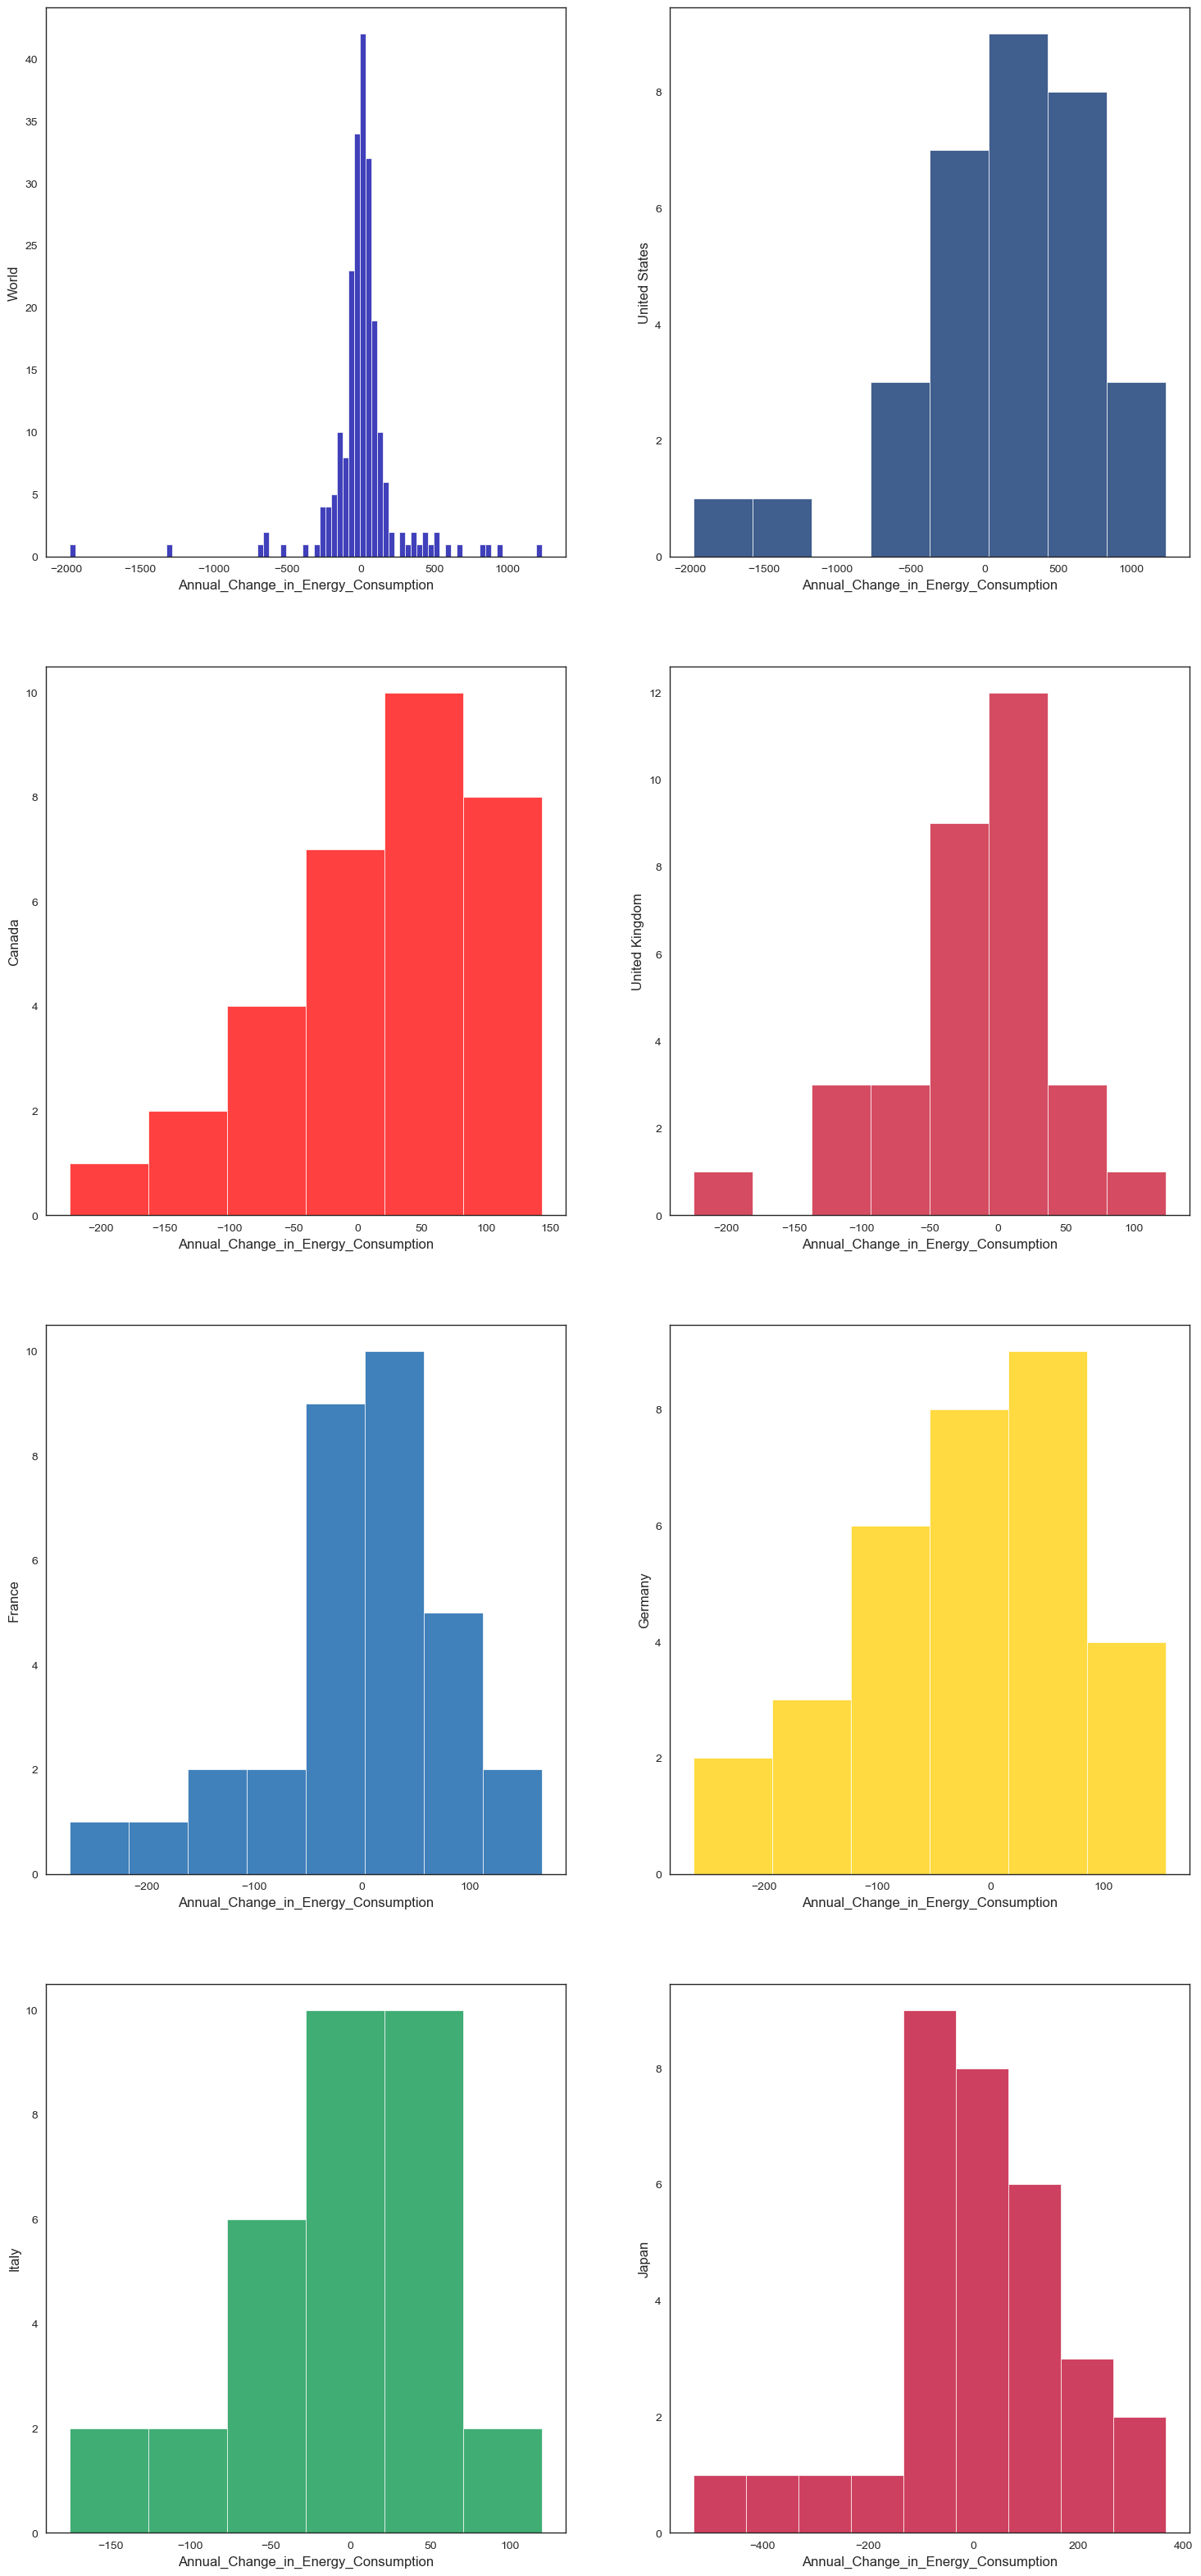

In [143]:
# Setting the style
sns.set_style("white")

fig, axes = plt.subplots(4, 2, figsize=(18, 40))
i=0
j=0

# Making histplot for annual energy consumption
sns.histplot(ax=axes[0, 0], data=df_WE_G7, x='Annual_Change_in_Energy_Consumption', color='#0000A5')
axes[0, 0].set(ylabel = 'World')
    
for C in G7_Countries:
    if j==1:
        j=0
        i+=1
    else:
        j+=1
    sns.histplot(ax=axes[i, j], data=df_WE_G7[df_WE_G7.country == C], x='Annual_Change_in_Energy_Consumption', color = G7_Color[G7_Countries.index(C)])
    axes[i, j].set(ylabel = C)


<div class="alert alert-block alert-info">
    <span>
        <b><ins>Insights</ins></b><br><br>
            1. U.S. energy consumption has fluctuated over the past decade, reflecting economic conditions, energy prices, and policies. Despite these variations, the share of renewable energy has steadily increased, signaling a shift towards cleaner energy and reduced carbon emissions.<br><br>
            2. Energy consumption in the U.S. declined during the global financial crisis (2008-2009) and the COVID-19 pandemic (2020), highlighting the impact of economic downturns on energy demand. These reductions emphasize the importance of energy efficiency in addressing long-term energy challenges.<br><br>
            3. G7 nations are reducing reliance on nuclear energy and investing in renewables, driven by environmental and health concerns. Japan, after the 2011 Fukushima disaster, significantly decreased its nuclear use, shifting focus to alternative energy sources. Germany and the UK have also seen significant growth in renewable energy adoption, supported by favorable policies and technological advancements.<br><br>
    </span>  
</div>

<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            7.4 Energy consumption by sources
        </span>   
    </font>    
</h3>

In [144]:
# Visualizing the energy consumption by sources

@interact(Country = G7_Countries)

def f(Country):
    df2 = df_WE_G7[df_WE_G7['country'] == Country]
    sns.lineplot(x="year", y="Fossil_Consumption_PerCapita", data=df2, label='Fossil').set(title = "Energy Consumption by Different Sources Per Capita", xlabel='Year', ylabel='Consumption Per Capita (kWh)')
    sns.lineplot(x="year", y="Nuclear_Consumption_PerCapita", data=df2, label='Nuclear')
    sns.lineplot(x="year", y="Renewables_Consumption_PerCapita", data=df2, label='Renewables')
    return

interactive(children=(Dropdown(description='Country', options=('United States', 'Canada', 'United Kingdom', 'F…

<div class="alert alert-block alert-info">
    <span>
        <b><ins>Insights</ins></b><br><br>
            1. Although the United States, the United Kingdom, Germany, Italy, and Japan continue to depend significantly on fossil fuels, Canada and France have achieved considerable advancements in the adoption of renewable energy sources.<br><br>
            2. Even though their energy systems are predominantly fossil fuel-based, Canada and France are among the leading G7 nations in terms of renewable energy consumption. This indicates their commitment to shifting towards a more sustainable energy portfolio and diminishing their reliance on fossil fuels. <br><br>
            3. Furthermore, all G7 nations have begun to decrease their dependence on nuclear energy, driven by increasing apprehensions regarding the environmental and health implications of nuclear power. These initiatives to curtail fossil fuel and nuclear energy usage, alongside heightened investments in renewable energy, underscore the dedication of G7 countries to fostering a more sustainable and secure energy landscape..<br><br>
    </span>  
</div>

<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            7.5 Electricity generation by sources
        </span>   
    </font>    
</h3>

In [145]:
# Visualizing the electricity generation by sources

@interact(Country = G7_Countries)

def f(Country):
    df2 = df_WE_G7[df_WE_G7['country'] == Country]
    sns.lineplot(x="year", y="%Electricity_from_Fossil", data=df2, label='Fossil').set(title = "Electricity Generation from Different Sources", xlabel='Year', ylabel='Electricity generation (kWh)')
    sns.lineplot(x="year", y="%Electricity_from_Nuclear", data=df2, label='Nuclear')
    sns.lineplot(x="year", y="%Electricity_from_Renewables", data=df2, label='Renewables')
    return

interactive(children=(Dropdown(description='Country', options=('United States', 'Canada', 'United Kingdom', 'F…

<div class="alert alert-block alert-info">
    <span>
        <b><ins>Insights</ins></b><br><br>
            1. The energy mix for electricity production among the G7 countries varies greatly, with each country having its own unique approach to balancing its energy sources. <br><br>
            2. The United States has long been reliant on fossil fuels for electricity production, but has started to invest in renewable energy sources in recent years. <br><br>
            3. Meanwhile, Canada primarily relies on renewable energy sources for its electricity production.<br><br>
            4. The United Kingdom, Germany, and Italy have been successful in increasing their investment in renewable energy, resulting in a balance between electricity production from fossil and renewable sources.<br><br> 
            5. France primarily relies on nuclear power for electricity production.<br><br>
            6. Japan continues to rely heavily on fossil fuels, with an increase in the use of fossil fuels for electricity production following a reduction in the use of nuclear energy. <br><br>
            7. These differences reflect the diverse energy needs, resources, and priorities of the G7 countries, and highlight the importance of developing a flexible and diverse energy mix that can meet the needs of different countries and regions.<br><br>
    </span>  
</div>

<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            7.6 Renewable energy by sources
        </span>   
    </font>    
</h3>

In [146]:
# Visualizing renewable energy by sources

@interact(Country = G7_Countries)

def f(Country):
    df2 = df_WE_G7[df_WE_G7['country'] == Country]
    sns.lineplot(x="year", y="hydro_elec_per_capita", data=df2, label='Hydro').set(title = "Electricity Generation from each Renewable Energy Source", xlabel='Year', ylabel='Electric generation (kWh)')
    sns.lineplot(x="year", y="solar_elec_per_capita", data=df2, label='Solar')
    sns.lineplot(x="year", y="wind_elec_per_capita", data=df2, label='Wind')
    sns.lineplot(x="year", y="biofuel_elec_per_capita", data=df2, label='Biofuel')
    sns.lineplot(x="year", y="other_renewables_elec_per_capita", data=df2, label='Other Renewable')
    return

interactive(children=(Dropdown(description='Country', options=('United States', 'Canada', 'United Kingdom', 'F…

<div class="alert alert-block alert-info">
    <span>
        <b><ins>Insights</ins></b><br><br>
            1. Each G7 nation exhibits unique strengths and focal points regarding renewable energy sources.<br><br>
            2. The United States predominantly utilizes hydropower within its renewable energy portfolio, while solar energy has seen substantial growth in recent years.<br><br>
            3. Canada’s renewable energy framework is largely centered on hydropower, complemented by a smaller share of wind energy.<br><br>
            4. In contrast, the United Kingdom and Germany primarily depend on wind energy, whereas France relies mainly on hydropower but has also witnessed a rise in wind energy utilization.<br><br>
            5. Italy's energy strategy is chiefly anchored in hydropower, although there has been a notable increase in solar energy adoption.<br><br>
            6. Japan's renewable energy landscape is significantly supported by hydropower, alongside a marked rise in solar energy in recent years.<br><br>
            7. These variations underscore the distinct energy requirements, available resources, and strategic priorities of each G7 country, emphasizing the necessity for a versatile and varied energy mix capable of addressing the diverse needs of different nations and regions.<br><br>
    </span>  
</div>

<a id="Overview"></a>
<h2>   
    <font color = blue>
        <span style='font-family:monospace'>
            8. World Overview
        </span>   
    </font>    
</h2>

https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html

In [147]:
# Changing the name of the United States
df_WE_all.loc[df_WE_all['country'] == 'United States', 'country'] = 'United States of America'

In [148]:
# Creating a new data frame for the average consumption between 1990 and 2021

df_tmp = df_WE_all[df_WE_all.year.between(1990, 2022)].groupby('country').agg({'energy_per_capita':['mean'], 'net_elec_imports':['mean'], 'per_capita_electricity':['mean'],
                                          'fossil_elec_per_capita':['mean'], 'nuclear_elec_per_capita':['mean'], 'renewables_elec_per_capita':['mean']}).reset_index()

df_tmp.columns = ['Country', 'Energy_Consumption_PerCapita', 'Net_Electricity_Imports', 'Electricity_Comsumption_PerCapita',
                  'Electricity_from_Fossil_PerCapita', 'Electricity_from_Nuclear_PerCapita', 'Electricity_from_Renewables_PerCapita']

In [149]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.explore()

In [150]:
world = pd.merge(left=world, right=df_tmp, how='left', left_on='name', right_on='Country')

In [151]:
world.drop(world[world.name.isnull() == True].index, inplace=True)

In [152]:
world.drop(world[world.Energy_Consumption_PerCapita.isnull() == True].index, inplace=True)

In [161]:
energyTypeWorld = ['Energy_Consumption_PerCapita', 'Net_Electricity_Imports', 'Electricity_Comsumption_PerCapita', 'Electricity_from_Fossil_PerCapita',
                  'Electricity_from_Nuclear_PerCapita', 'Electricity_from_Renewables_PerCapita']

tooltipList = ['Country', 'Energy_Consumption_PerCapita', 'Net_Electricity_Imports', 'Electricity_Comsumption_PerCapita', 'Electricity_from_Fossil_PerCapita',
                  'Electricity_from_Nuclear_PerCapita', 'Electricity_from_Renewables_PerCapita']

@interact(EnergyType = energyTypeWorld)

def f(EnergyType):
    x = world.explore(
        column=EnergyType,  # make choropleth based on "BoroName" column
        scheme="quantiles",  # use mapclassify's natural breaks scheme
        legend=True, # show legend
        cmap='OrRd',
        k=10, # use 10 bins
        legend_kwds=dict(colorbar=False), # do not use color bar
        tooltip=tooltipList,
        tooltip_kwds=dict(labels=True), # do not show column label in the tooltip
        name="countries" # name of the layer in the map
    )
    return x

interactive(children=(Dropdown(description='EnergyType', options=('Energy_Consumption_PerCapita', 'Net_Electri…

<a id="Conclusion"></a>
<h2>   
    <font color = blue>
        <span style='font-family:monospace'>
            9. Conclusion
        </span>   
    </font>    
</h2>

<div class="alert alert-block alert-info">
    <span>
        <b><ins></ins></b><br>
        Among the G7 countries, the United States is the country that consumes the most energy. However, as of the most recent data, China has the highest energy consumption, followed by the United States. This is primarily due to China's large population, rapid industrialization, and increasing demand for energy. Other large consumers include India and Russia.<br><br>

In terms of energy consumption per capita, Canada ranks first among the G7. However, globally, smaller countries like Qatar, Kuwait, and the United Arab Emirates are leading due to their high energy use compared to their small population sizes.<br><br>

There are a lot of things that we can discuss regarding energy in this world. With the right data analysis technique, we can get the answers to our questions and tackle the problems that appear. 
    </span>  
</div>